In [ ]:
# Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing csv from web

features_csv = pd.read_csv('https://raw.githubusercontent.com/GregorioMorena/Flu_Shot/master/training_set_features.csv')
labels_csv = pd.read_csv('https://raw.githubusercontent.com/GregorioMorena/Flu_Shot/master/training_set_labels.csv')
test_csv = pd.read_csv('https://raw.githubusercontent.com/GregorioMorena/Flu_Shot/master/test_set_features.csv')

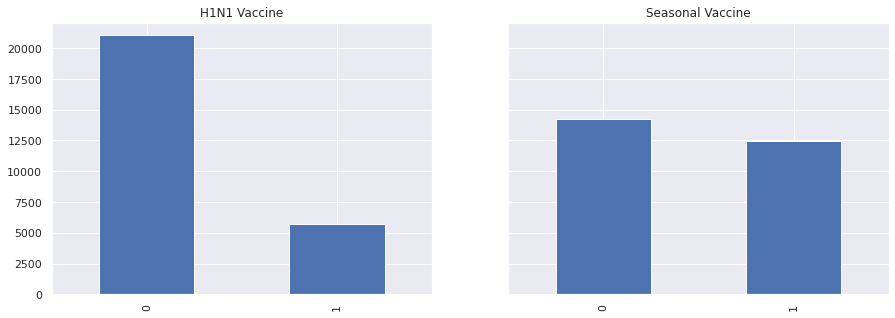

In [ ]:
# Lets take a look over the labels

sns.set()

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15,5))

labels_csv['h1n1_vaccine'].value_counts().plot(kind='bar', ax=ax[0]).set_title('H1N1 Vaccine')
labels_csv['seasonal_vaccine'].value_counts().plot(kind='bar', ax=ax[1]).set_title('Seasonal Vaccine')
plt.show()

In [ ]:
# Are there missing values in the features?

features_csv.isnull().sum().div(len(features_csv)).sort_values(ascending=False).head()

employment_occupation    0.504362
employment_industry      0.499120
health_insurance         0.459580
income_poverty           0.165612
doctor_recc_seasonal     0.080878
dtype: float64

In [ ]:
# As we notice, the health insurance and the employment occupation and industry features
# have near the half of missing values. Lets check the employment status vs the employment
# occupation and industry

print(features_csv[features_csv['employment_occupation'].isnull()]['employment_status'].value_counts())

print('\n')

print(features_csv[features_csv['employment_industry'].isnull()]['employment_status'].value_counts())

Not in Labor Force    10231
Unemployed             1453
Employed                323
Name: employment_status, dtype: int64


Not in Labor Force    10231
Unemployed             1453
Employed                183
Name: employment_status, dtype: int64


In [ ]:
# That's great! The missing values in the employment_occupation and employment_industry column are mostly
# observations that are not in labor force or unemployed. Lets assing them a especific value

features_csv['employment_occupation'].fillna(value='no_employ',inplace=True)
features_csv['employment_industry'].fillna(value='no_employ',inplace=True)

# Display the top 5 features with missing values 

features_csv.isnull().sum().div(len(features_csv)).sort_values(ascending=False).head()


health_insurance        0.459580
income_poverty          0.165612
doctor_recc_h1n1        0.080878
doctor_recc_seasonal    0.080878
rent_or_own             0.076459
dtype: float64

In [ ]:
# As healt_insurance could be an interesting feature, and we have not found a criteria to fill the mising values, lets
# fill them as they have any health insurance

features_csv['health_insurance'].fillna(value=0, inplace=True)

# Check again the missing values

features_csv.isnull().sum().div(len(features_csv)).sort_values(ascending=False).head()

income_poverty          0.165612
doctor_recc_h1n1        0.080878
doctor_recc_seasonal    0.080878
rent_or_own             0.076459
employment_status       0.054780
dtype: float64

In [ ]:
# The income poverty feature has a lower, but still high rate of missing values. Lets assing a specific value for those missing values
# as we did with health insurance

features_csv['income_poverty'].fillna(value='No Information', inplace=True)


# Lets check the missing values again

features_csv.isnull().sum().div(len(features_csv)).sort_values(ascending=False).head()

doctor_recc_h1n1        0.080878
doctor_recc_seasonal    0.080878
rent_or_own             0.076459
employment_status       0.054780
marital_status          0.052720
dtype: float64

In [ ]:
# The income poverty feature has a lower, but still high rate of missing values. Lets assing a specific value for those missing values
# as we did with health insurance

features_csv['income_poverty'].fillna(value='No Information', inplace=True)


# Lets check the missing values again

features_csv.isnull().sum().div(len(features_csv)).sort_values(ascending=False).head()

doctor_recc_h1n1        0.080878
doctor_recc_seasonal    0.080878
rent_or_own             0.076459
employment_status       0.054780
marital_status          0.052720
dtype: float64

In [ ]:
# There are still some features to work on. Lets group some values of the hhs_geo_region, employment_industry and employment_occupation

df = labels_csv.set_index('respondent_id').join(features_csv.set_index('respondent_id'))

region_table = df[['h1n1_vaccine','hhs_geo_region']].groupby(by=['h1n1_vaccine', 'hhs_geo_region']).size().unstack('h1n1_vaccine')
region_counts = region_table.sum(axis=1)
region_rates = region_table.div(region_counts, axis=0).reset_index()
print(region_rates.sort_values(1, ascending=False), '\n')

eindustry_table = df[['h1n1_vaccine','employment_industry']].groupby(by=['h1n1_vaccine', 'employment_industry']).size().unstack('h1n1_vaccine')
eindustry_count = eindustry_table.sum(axis=1)
eindustry_rates = eindustry_table.div(eindustry_count, axis=0).reset_index()
print(eindustry_rates.sort_values(1, ascending=False), '\n')

eoccupation_table = df[['h1n1_vaccine','employment_occupation']].groupby(by=['h1n1_vaccine', 'employment_occupation']).size().unstack('h1n1_vaccine')
eoccupation_count = eoccupation_table.sum(axis=1)
eoccupation_rates = eoccupation_table.div(eoccupation_count, axis=0).reset_index()
print(eoccupation_rates.sort_values(1, ascending=False), '\n')


h1n1_vaccine hhs_geo_region         0         1
1                  bhuqouqj  0.741391  0.258609
8                  oxchjgsf  0.769150  0.230850
7                  mlyzmhmf  0.769505  0.230495
9                  qufhixun  0.777563  0.222437
0                  atmpeygn  0.782587  0.217413
5                  lrircsnp  0.789702  0.210298
3                  fpwskwrf  0.798469  0.201531
4                  kbazzjca  0.801610  0.198390
6                  lzgpxyit  0.819874  0.180126
2                  dqpwygqj  0.828597  0.171403 

h1n1_vaccine employment_industry         0         1
5                       haxffmxo  0.378378  0.621622
4                       fcxhlnwr  0.602107  0.397893
19                      wxleyezf  0.754435  0.245565
0                       arjwrbjb  0.761194  0.238806
14                      qnlwzans  0.769231  0.230769
11                     no_employ  0.792123  0.207877
6                       ldnlellj  0.827782  0.172218
16                      saaquncn  0.828402  0.

In [ ]:
# Lets assing some numeric values to those observations with similar h1n1 vaccine rate

features_csv['hhs_geo_region'].replace(['atmpeygn', 'bhuqouqj', 'dqpwygqj', 'fpwskwrf', 'kbazzjca', 'lrircsnp', 'lzgpxyit', 'mlyzmhmf',
                              'oxchjgsf', 'qufhixun'],
                     [2, 3, 1, 1, 1, 1, 1, 2, 2, 2], inplace=True)

features_csv['employment_occupation'].replace(['bxpfxfdn', 'ccgxvspp', 'cmhcxjea', 'dcjcmpih', 'dlvbwzss', 'emcorrxb', 'haliazsg', 'hfxkjkmi',
                                     'hodpvpew', 'kldqjyjy', 'mxkfnird', 'no_employ', 'oijqvulv', 'pvmttkik', 'qxajmpny', 'rcertsgn',
                                     'tfqavkke', 'ukymxvdu', 'uqqtjvyb', 'vlluhbov', 'xgwztkwe', 'xqwwgdyp', 'xtkaffoo', 'xzmlyyjv'],
                                    [3, 2, 4, 5, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2], inplace=True)

features_csv['employment_industry'].replace(['no_employ', 'fcxhlnwr', 'wxleyezf', 'ldnlellj', 'pxcmvdjn', 'atmlpfrs', 'arjwrbjb', 'xicduogh',
                                    'mfikgejo', 'vjjrobsf', 'rucpziij', 'xqicxuve', 'saaquncn', 'cfqqtusy', 'nduyfdeo', 'mcubkhph',
                                    'wlfvacwt', 'dotnnunm', 'haxffmxo', 'msuufmds', 'phxvnwax', 'qnlwzans'],
                                  [1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2], inplace=True)

features_csv['age_group'].replace(['65+ Years', '55 - 64 Years', '45 - 54 Years', '18 - 34 Years', '35 - 44 Years'],
                                  [5,4,3,1,2], inplace=True)

features_csv['education'].replace(['College Graduate', 'Some College', '12 Years', '< 12 Years'],
                                  [4,3,2,1], inplace=True)

features_csv['race'].replace(['White', 'Black', 'Hispanic', 'Other or Multiple'],
                             [3,0,1,2], inplace=True)

features_csv['sex'].replace(['Female', 'Male'],
                            [1, 0], inplace=True)

features_csv['income_poverty'].replace(['<= $75,000, Above Poverty','> $75,000','No Information','Below Poverty'],
                                       [1,2,0,0], inplace=True)

features_csv['marital_status'].replace(['Married', 'Not Married'],
                                       [1,0], inplace=True)

features_csv['rent_or_own'].replace(['Own', 'Rent'],
                                    [1,0], inplace=True)

features_csv['employment_status'].replace(['Employed', 'Not in Labor Force','Unemployed'],
                                          [0, 1, 1], inplace=True)

In [ ]:
# Lets create some new features combining others

features_csv['doctor_recc'] = features_csv['doctor_recc_h1n1'] + features_csv['doctor_recc_seasonal']
features_csv['gathering_outside'] = features_csv['behavioral_large_gatherings'] + features_csv['behavioral_outside_home']
features_csv['opinion_risk'] = features_csv['opinion_seas_risk'] + features_csv['opinion_h1n1_risk']
features_csv['opinion_sick'] = features_csv['opinion_h1n1_sick_from_vacc'] + features_csv['opinion_seas_sick_from_vacc']
features_csv['opinion_vacc_effective'] = features_csv['opinion_seas_vacc_effective'] + features_csv['opinion_h1n1_vacc_effective']

features_csv['h1n1_overall'] = features_csv['h1n1_concern'] + features_csv['h1n1_knowledge']
features_csv['behavior'] =  features_csv['behavioral_antiviral_meds'] + features_csv['behavioral_avoidance'] + features_csv['behavioral_face_mask'] + features_csv['behavioral_wash_hands'] + features_csv['behavioral_large_gatherings'] + features_csv['behavioral_outside_home'] + features_csv['behavioral_touch_face']
features_csv['condition'] = features_csv['chronic_med_condition'] + features_csv['child_under_6_months'] + features_csv['health_worker']
features_csv['opinion'] = features_csv['opinion_h1n1_vacc_effective'] + features_csv['opinion_h1n1_risk'] + features_csv['opinion_h1n1_sick_from_vacc'] + features_csv['opinion_seas_vacc_effective'] + features_csv['opinion_seas_risk'] + features_csv['opinion_seas_sick_from_vacc']


In [ ]:
df = labels_csv.set_index('respondent_id').join(features_csv.set_index('respondent_id'))
df.columns

Index(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'doctor_recc', 'gathering_outside',
       'opinion_risk', 'opinion_sick', 'opinion_vacc_effective',
       'h1n1_overall',

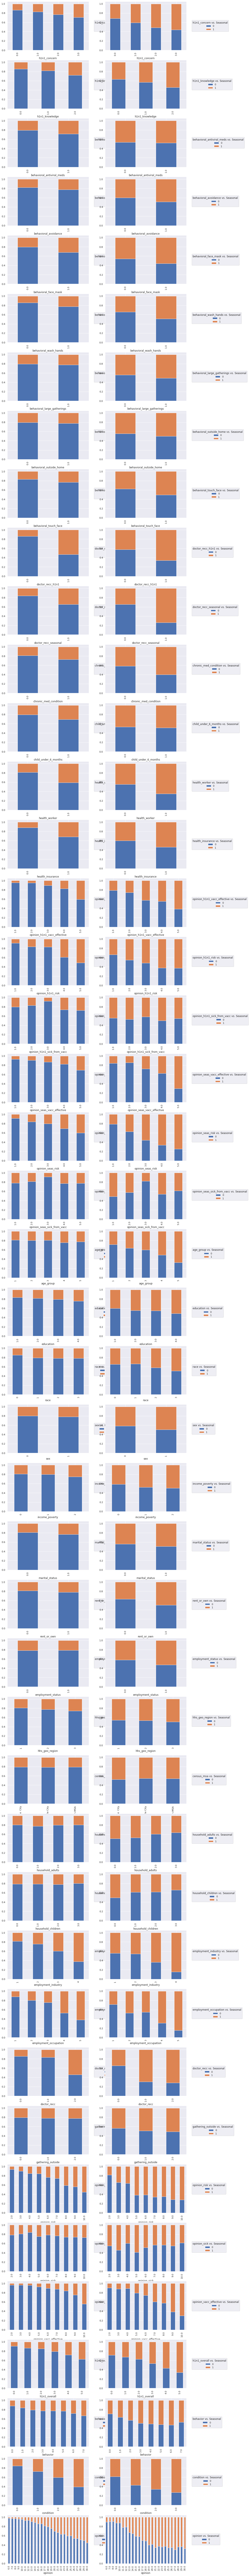

In [ ]:
variables = df.columns.to_list()[2:]

fig, ax = plt.subplots(len(variables), 2, figsize=(15,len(variables)*5))

for i in range(len(variables)):
  h1n1_table = df[['h1n1_vaccine', variables[i]]].groupby(by=['h1n1_vaccine', variables[i]]).size().unstack('h1n1_vaccine')
  h1n1_counts = h1n1_table.sum(axis=1)
  h1n1_rates = h1n1_table.div(h1n1_counts, axis=0)
  ax[i, 0] = h1n1_rates.plot(kind='bar', stacked=True, ax=ax[i,0])
  ax[i, 0].legend(
      loc='center left',
      bbox_to_anchor=(1.05, 0.5),
      title=variables[i]+' vs. H1N1'
  )

  sea_table = df[['seasonal_vaccine', variables[i]]].groupby(by=['seasonal_vaccine', variables[i]]).size().unstack('seasonal_vaccine')
  sea_counts = sea_table.sum(axis=1)
  sea_rates = sea_table.div(h1n1_counts, axis=0)
  ax[i, 1] = sea_rates.plot(kind='bar', stacked=True, ax=ax[i,1])
  ax[i, 1].legend(
      loc='center left',
      bbox_to_anchor=(1.05, 0.5),
      title=variables[i]+' vs. Seasonal'
  )

plt.show()

In [ ]:
df = df[df.columns[df.dtypes != 'object']]

df.fillna(df.median(), inplace=True)

X = df[df.columns[2:].to_list()]
y = df['h1n1_vaccine']
RANDOM_SEED = 9
depth = 5

# Predicting h1n1

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=RANDOM_SEED)

h1n1_clf = RandomForestClassifier(max_depth=depth)

h1n1_clf.fit(X_train, y_train)
h1n1_pred = h1n1_clf.predict_proba(X_test)[:,1]

h1n1_proba = roc_auc_score(y_test, h1n1_pred)

In [ ]:
# Predicting seasonal

y = df['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=RANDOM_SEED)

seas_clf = RandomForestClassifier(max_depth=depth)

seas_clf.fit(X_train, y_train)
seas_pred = seas_clf.predict_proba(X_test)[:,1]

seasonal_proba = roc_auc_score(y_test, seas_pred)

In [ ]:
# Preprocessing test_csv

test_csv['employment_occupation'].fillna(value='no_employ',inplace=True)
test_csv['employment_industry'].fillna(value='no_employ',inplace=True)
test_csv['health_insurance'].fillna(value=0, inplace=True)
test_csv['income_poverty'].fillna(value='No Information', inplace=True)
test_csv['income_poverty'].fillna(value='No Information', inplace=True)


test_csv['hhs_geo_region'].replace(['atmpeygn', 'bhuqouqj', 'dqpwygqj', 'fpwskwrf', 'kbazzjca', 'lrircsnp', 'lzgpxyit', 'mlyzmhmf',
                              'oxchjgsf', 'qufhixun'],
                     [2, 3, 1, 1, 1, 1, 1, 2, 2, 2], inplace=True)
test_csv['employment_occupation'].replace(['bxpfxfdn', 'ccgxvspp', 'cmhcxjea', 'dcjcmpih', 'dlvbwzss', 'emcorrxb', 'haliazsg', 'hfxkjkmi',
                                     'hodpvpew', 'kldqjyjy', 'mxkfnird', 'no_employ', 'oijqvulv', 'pvmttkik', 'qxajmpny', 'rcertsgn',
                                     'tfqavkke', 'ukymxvdu', 'uqqtjvyb', 'vlluhbov', 'xgwztkwe', 'xqwwgdyp', 'xtkaffoo', 'xzmlyyjv'],
                                    [3, 2, 4, 5, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2], inplace=True)
test_csv['employment_industry'].replace(['no_employ', 'fcxhlnwr', 'wxleyezf', 'ldnlellj', 'pxcmvdjn', 'atmlpfrs', 'arjwrbjb', 'xicduogh',
                                    'mfikgejo', 'vjjrobsf', 'rucpziij', 'xqicxuve', 'saaquncn', 'cfqqtusy', 'nduyfdeo', 'mcubkhph',
                                    'wlfvacwt', 'dotnnunm', 'haxffmxo', 'msuufmds', 'phxvnwax', 'qnlwzans'],
                                  [1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2], inplace=True)
test_csv['age_group'].replace(['65+ Years', '55 - 64 Years', '45 - 54 Years', '18 - 34 Years', '35 - 44 Years'],
                                  [5,4,3,1,2], inplace=True)
test_csv['education'].replace(['College Graduate', 'Some College', '12 Years', '< 12 Years'],
                                  [4,3,2,1], inplace=True)
test_csv['race'].replace(['White', 'Black', 'Hispanic', 'Other or Multiple'],
                             [3,0,1,2], inplace=True)
test_csv['sex'].replace(['Female', 'Male'],
                            [1, 0], inplace=True)
test_csv['income_poverty'].replace(['<= $75,000, Above Poverty','> $75,000','No Information','Below Poverty'],
                                       [1,2,0,0], inplace=True)
test_csv['marital_status'].replace(['Married', 'Not Married'],
                                       [1,0], inplace=True)
test_csv['rent_or_own'].replace(['Own', 'Rent'],
                                    [1,0], inplace=True)
test_csv['employment_status'].replace(['Employed', 'Not in Labor Force','Unemployed'],
                                          [0, 1, 1], inplace=True)


test_csv['doctor_recc'] = test_csv['doctor_recc_h1n1'] + test_csv['doctor_recc_seasonal']
test_csv['gathering_outside'] = test_csv['behavioral_large_gatherings'] + test_csv['behavioral_outside_home']
test_csv['opinion_risk'] = test_csv['opinion_seas_risk'] + test_csv['opinion_h1n1_risk']
test_csv['opinion_sick'] = test_csv['opinion_h1n1_sick_from_vacc'] + test_csv['opinion_seas_sick_from_vacc']
test_csv['opinion_vacc_effective'] = test_csv['opinion_seas_vacc_effective'] + test_csv['opinion_h1n1_vacc_effective']
test_csv['h1n1_overall'] = test_csv['h1n1_concern'] + test_csv['h1n1_knowledge']
test_csv['behavior'] =  test_csv['behavioral_antiviral_meds'] + test_csv['behavioral_avoidance'] + test_csv['behavioral_face_mask'] + test_csv['behavioral_wash_hands'] + test_csv['behavioral_large_gatherings'] + test_csv['behavioral_outside_home'] + test_csv['behavioral_touch_face']
test_csv['condition'] = test_csv['chronic_med_condition'] + test_csv['child_under_6_months'] + test_csv['health_worker']
test_csv['opinion'] = test_csv['opinion_h1n1_vacc_effective'] + test_csv['opinion_h1n1_risk'] + test_csv['opinion_h1n1_sick_from_vacc'] + test_csv['opinion_seas_vacc_effective'] + test_csv['opinion_seas_risk'] + test_csv['opinion_seas_sick_from_vacc']

test_csv = test_csv[test_csv.columns[test_csv.dtypes != 'object']]

test_csv.fillna(test_csv.median(), inplace=True)

In [ ]:
# Refit the models and predicting h1n1 and seasonal

# H1N1

h1n1_y = df['h1n1_vaccine']

h1n1_clf.fit(X, h1n1_y)
h1n1_pred = h1n1_clf.predict_proba(X)[:,1]

h1n1_proba_ = roc_auc_score(h1n1_y, h1n1_pred)
print(h1n1_proba_)

seas_y = df['seasonal_vaccine']

seas_clf.fit(X, seas_y)
seas_pred = seas_clf.predict_proba(X)[:,1]

seasonal_proba_ = roc_auc_score(seas_y, seas_pred)
print(seasonal_proba_)

0.8470283056045285
0.842216636938087


In [ ]:
print('The diference between h1n1 train and test is of ', h1n1_proba - h1n1_proba_)

print('The diference between seasonal train and test is of ', seasonal_proba - seasonal_proba_)

The diference between h1n1 train and test is of  0.00034973249407599383
The diference between seasonal train and test is of  0.0018784448573148094


In [ ]:
# Submission

X_test = test_csv[test_csv.columns[1:]]

submission = pd.DataFrame()

submission['respondent_id'] = test_csv['respondent_id']

submission['h1n1_vaccine'] = h1n1_clf.predict_proba(X_test)[:,1]
submission['seasonal_vaccine'] = seas_clf.predict_proba(X_test)[:,1]

submission.set_index('respondent_id', inplace=True)

submission.head()

from google.colab import files

submission.to_csv('flu_submission_3.csv')
files.download('flu_submission_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

![picture](https://raw.githubusercontent.com/GregorioMorena/Flu_Shot/master/flu_submission.png)